# Heart Disease Predictor

In [31]:
# Important libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split

import warnings
warnings.filterwarnings('ignore')

In [33]:
# Import dataset
df = pd.read_csv('heart_disease_data.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [34]:
# Identifying the Missing Values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [36]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


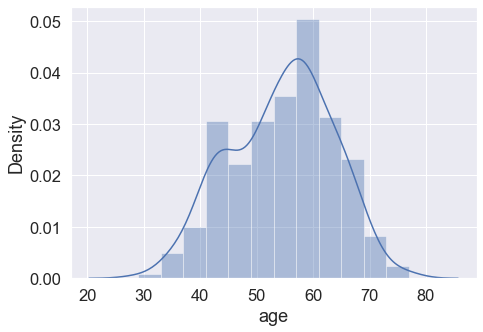

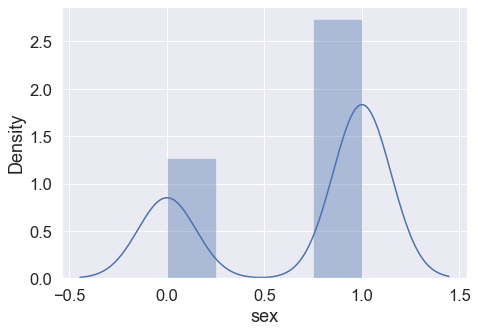

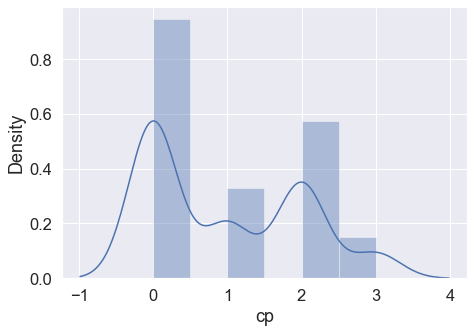

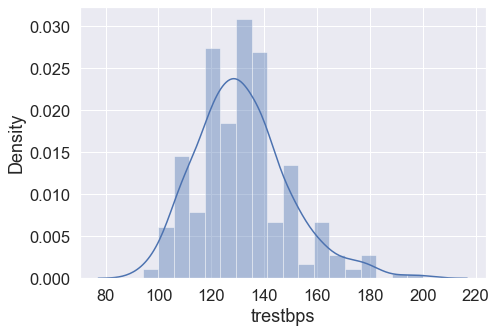

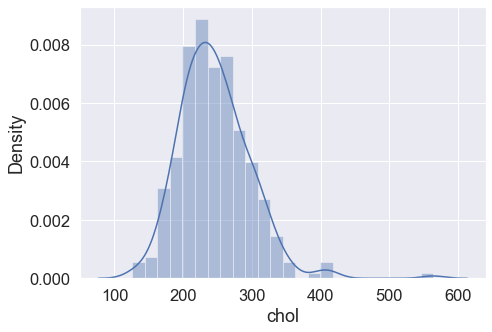

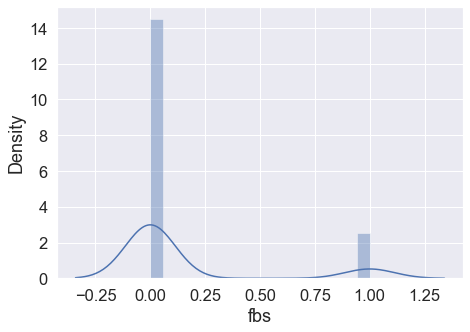

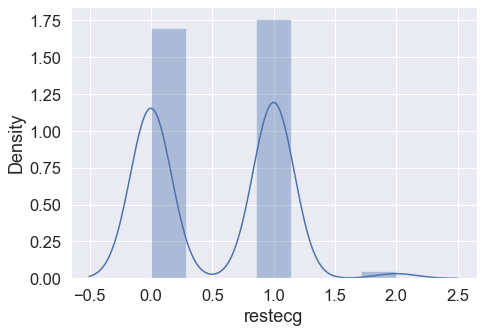

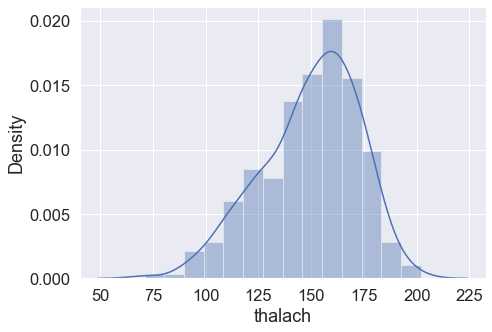

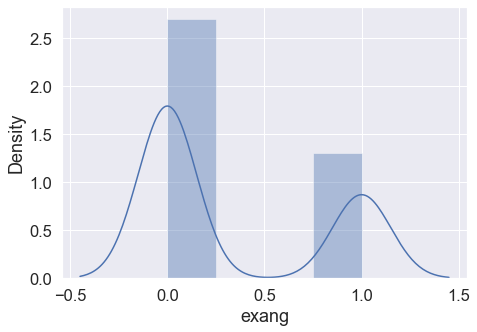

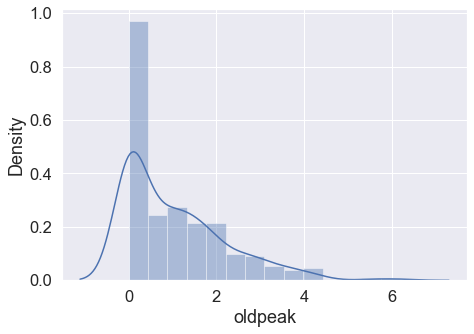

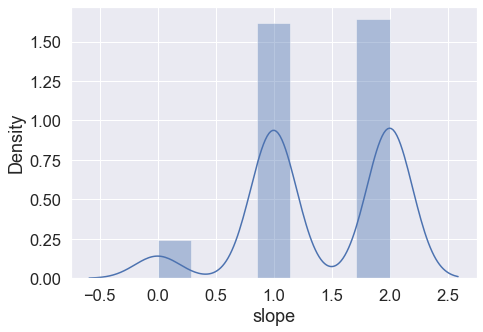

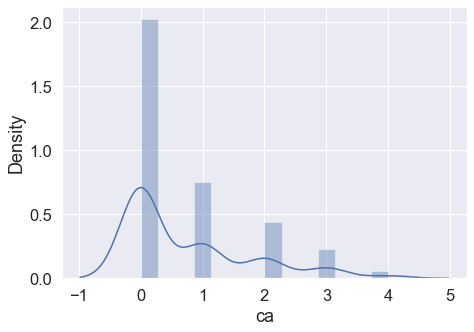

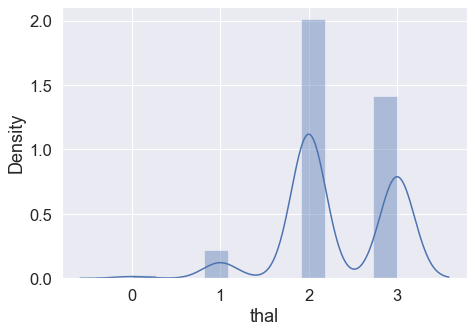

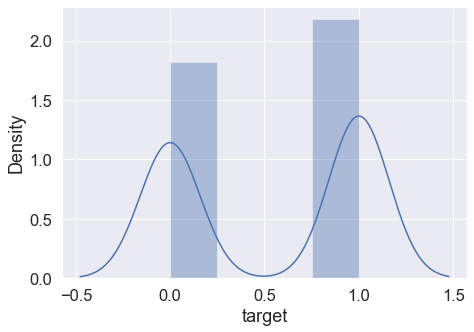

In [37]:
# Outlier Detection
for col in df.columns:
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.show()

In [38]:
# Outlier Removal
for col in df.columns:
    if col not in ['restecg', 'sex','cp','fbs','exang','slope','thal','target']:
        upper_limit = df[col].mean() + 3*df[col].std()
        lower_limit = df[col].mean() - 3*df[col].std()
        df[col] = np.where(df[col]>upper_limit,upper_limit,np.where(df[col]<lower_limit,lower_limit,df[col]))
        

In [39]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.546127,245.637047,0.148515,0.528053,149.679642,0.326733,1.030514,1.399340,0.726026,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.273150,49.012337,0.356198,0.525860,22.799107,0.469794,1.127528,0.616226,1.012141,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,80.931381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,184.238191,401.756279,1.000000,2.000000,202.000000,1.000000,4.522829,2.000000,3.797192,3.000000,1.000000


In [40]:
# Checking class balance
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

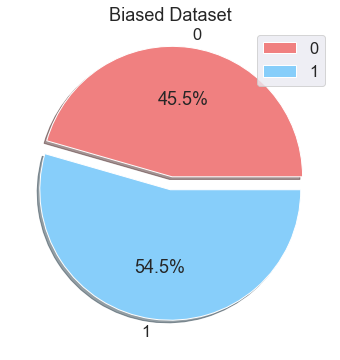

In [41]:
plt.figure(figsize=(6,6))
pie_labels=["0","1"]
pie_list=[df[df['target']==0].shape[0],df[df['target']==1].shape[0]]
colors = ['lightcoral', 'lightskyblue']
plt.pie(pie_list,labels=pie_labels, colors=colors,shadow=True,autopct="%1.1f%%", explode=(0.1,0))
plt.legend()
plt.title("Biased Dataset")
plt.show()

In [42]:
# Separating Features and Label
X = df.iloc[:, [0,1,2,3, 4, 5,6, 7,8,9,10,11,12]].values
Y = df.iloc[:, 13].values

In [43]:
X.shape,Y.shape

((303, 13), (303,))

In [44]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [14]:
# Feature Selection
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.06701693 0.0578055  0.13278943 0.06420629 0.05959819 0.02175499
 0.03633426 0.09201168 0.1028841  0.08663953 0.06633875 0.12504603
 0.08757432]


In [15]:
feature_importance = pd.DataFrame(model.feature_importances_)
lst=list(feature_importance.sort_values(0,ascending=False).head(6).index)
lst.sort()
lst

[2, 7, 8, 9, 11, 12]

In [16]:
X = X[:,lst]

In [17]:
for i in lst:
    print(df.columns[i])

cp
thalach
exang
oldpeak
ca
thal


In [18]:
# Split the Training Set and Testing Set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [19]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (242, 6)
X_test shape: (61, 6)
Y_train shape: (242,)
Y_test shape: (61,)


In [20]:
def evaluate_model(models):
   
    result_train = []
    result_test = []
    for model in models :
        trained_model = model.fit(X_train, Y_train)
        Y_pred = trained_model.predict(X_test)
        accuracy_test = accuracy_score(Y_test, Y_pred)
        accuracy_train = accuracy_score(Y_train, trained_model.predict(X_train))
        result_train.append(round((accuracy_train*100),2))
        result_test.append(round((accuracy_test*100),2))
        

    result_df = pd.DataFrame({
        "Accuracy Training Set":result_train,
        "Accuracy Testing Set":result_test,
        "Models":[
            "Logistic Regression",
            "Decision Tree Classifier",
            "AdaBoost Classifier",
            "Support Vector Machine",
            "Random Forest Classifier",
            "Gradient Boosting Classifier",
            "XGBoost",
            "Naive Bayes",
            "K-Nearest Neighbors Classifier",
            "LightGBM"
        ]
    })

    # Generate chart
    bar = sns.barplot(x = "Accuracy Testing Set", y = "Models", data = result_df, orient = "h",order=result_df.sort_values('Accuracy Testing Set',ascending = False).Models.head())
    bar.set_xlabel("Mean Accuracy")
    bar.set_title("Heart Disease Dataset Accuracy Scores")
    return result_df.sort_values('Accuracy Testing Set',ascending = False).head()

,Accuracy Training Set,Accuracy Testing Set,Models
3,87.60,90.16,Support Vector Machine
0,83.88,88.52,Logistic Regression
7,80.58,85.25,Naive Bayes
2,85.95,83.61,AdaBoost Classifier
4,99.59,83.61,Random Forest Classifier


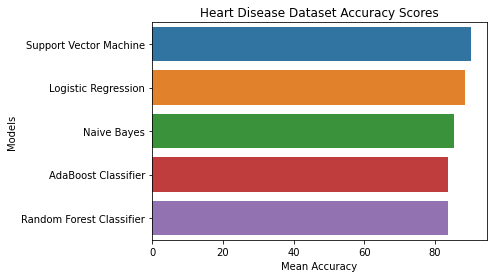

In [21]:
# Modeling: Test differents algorithms 
random_state = 30
models = [
    LogisticRegression(random_state = random_state),
    DecisionTreeClassifier(random_state = random_state),
    AdaBoostClassifier(),
    SVC(random_state = 0),
    RandomForestClassifier(random_state = random_state),
    GradientBoostingClassifier(random_state = random_state),
    XGBClassifier(eval_metric='logloss'),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=3),
    lgb.LGBMClassifier()
]
evaluate_model(models)

Accuracy: 90.16%
Precision: 0.91
Recall: 0.91
F1 Score: 0.91


Text(16.5, 0.5, 'Predicted Label')

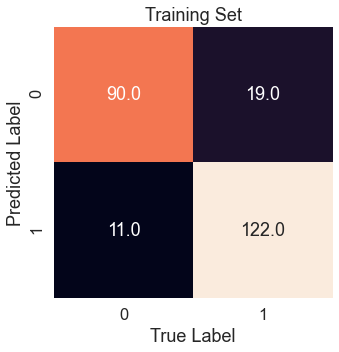

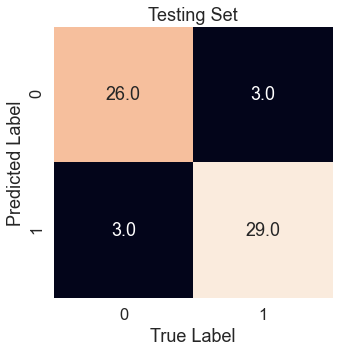

In [22]:
# Best Performing Model
model = SVC(probability=True)
svc = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
Y_pred2 = model.predict(X_train)

# Evaluating using metrics
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test,Y_pred)
f1 = metrics.f1_score(Y_test,Y_pred)
recall = metrics.recall_score(Y_test,Y_pred)
precision = metrics.precision_score(Y_test,Y_pred)
print("Accuracy: " + str(round((accuracy*100),2))+"%")
print("Precision: " + str(round((precision),2)))
print("Recall: " + str(round((recall),2)))
print("F1 Score: " + str(round((f1),2)))

# Confusion Matrix
sns.set(font_scale=1.5)
fig,ax=plt.subplots(figsize=(5,5))
ax=sns.heatmap(confusion_matrix(Y_train, Y_pred2),annot=True,cbar=False,fmt=".1f")
plt.title('Training Set')
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

sns.set(font_scale=1.5)
fig,ax=plt.subplots(figsize=(5,5))
ax=sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,cbar=False,fmt=".1f")
plt.title('Testing Set')
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

## Hyperparameter Tuning


### Decision Tree

In [26]:
# Splitting X and Y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [27]:
param_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

tuning = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
tuning.fit(X_train,Y_train)
tuning.best_params_,tuning.best_score_

Fitting 4 folds for each of 50 candidates, totalling 200 fits


({'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10},
 0.7647540983606558)

In [28]:
classifier=DecisionTreeClassifier(max_depth= 5,min_samples_leaf=10,criterion='gini')
model=classifier.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Test set accuracy: ', accuracy_score(Y_test, y_pred))

Test set accuracy:  0.7540983606557377


### Support Vector Machine

In [30]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'poly'],
             'degree': [0, 1, 2, 3, 4, 5, 6]}
 
tuning=GridSearchCV(estimator=SVC(),param_grid=param_grid,cv=2,verbose=1,n_jobs=-1,scoring='accuracy')
tuning.fit(X_train,Y_train)
tuning.best_params_,tuning.best_score_

Fitting 2 folds for each of 525 candidates, totalling 1050 fits


({'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}, 0.8057851239669422)

In [48]:
classifier=SVC(C=0.1,gamma=0.1,kernel='poly',degree=1,random_state=10)
model=classifier.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Test set accuracy: ', accuracy_score(Y_test, y_pred))

Test set accuracy:  0.9016393442622951


### Naive Bayes

In [33]:
param_grid={'var_smoothing': np.logspace(0,-9, num=100)}
tuning=GridSearchCV(estimator=GaussianNB(), param_grid=param_grid,cv=5,verbose=2,n_jobs=-1,scoring='accuracy')
tuning.fit(X_train,Y_train)
tuning.best_params_,tuning.best_score_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


({'var_smoothing': 1.0}, 0.8100340136054422)

In [34]:
classifier=GaussianNB(var_smoothing=1)
model=classifier.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Test set accuracy: ', accuracy_score(Y_test, y_pred))

Test set accuracy:  0.8688524590163934


### KNN

In [36]:
param_grid =[ { 'n_neighbors' : range(0,20,1),
               'algorithm':['auto','ball_tree','kd_tree','brute'],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
              'p':[0,1,2,3]}]
tuning=GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid,cv=5,verbose=2,n_jobs=-1,scoring='accuracy')
tuning.fit(X_train,Y_train)
tuning.best_params_,tuning.best_score_

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


({'algorithm': 'auto',
  'metric': 'minkowski',
  'n_neighbors': 14,
  'p': 1,
  'weights': 'uniform'},
 0.8431122448979591)

In [37]:
classifier=KNeighborsClassifier(algorithm='auto',metric= 'minkowski',n_neighbors=14,p=1,weights='uniform')
model=classifier.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Test set accuracy: ', accuracy_score(Y_test, y_pred))

Test set accuracy:  0.8852459016393442


### Random Forest

In [39]:
param_grid={'n_estimators':range(80,201,5),'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2',None]}

tuning=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=5,verbose=2,n_jobs=-1,scoring='accuracy')
tuning.fit(X_train,Y_train)
tuning.best_params_,tuning.best_score_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


({'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 160},
 0.810204081632653)

In [45]:
classifier=RandomForestClassifier(n_estimators=160,criterion='entropy',max_features='log2',random_state=10)
model=classifier.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Test set accuracy: ', accuracy_score(Y_test, y_pred))

Test set accuracy:  0.8360655737704918


### Logistic Regression

In [42]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [100, 10, 1.0, 0.1, 0.01],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
tuning = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, verbose = True, cv=5, n_jobs = -1,scoring='accuracy')
tuning.fit(X_train,Y_train)
tuning.best_params_,tuning.best_score_

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


({'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'},
 0.8224489795918368)

In [43]:
classifier=LogisticRegression(C= 0.01, max_iter= 100, penalty= 'l2', solver= 'lbfgs')
model=classifier.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Test set accuracy: ', accuracy_score(Y_test, y_pred))

Test set accuracy:  0.8688524590163934


## FINAL MODEL

In [23]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

Accuracy: 90.16%
Precision: 0.91
Recall: 0.91
F1 Score: 0.91


Text(16.5, 0.5, 'Predicted Label')

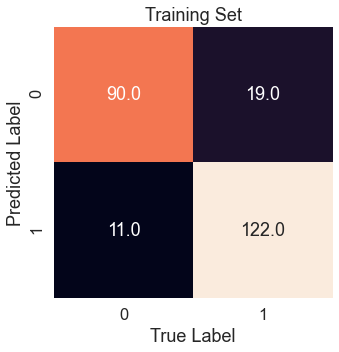

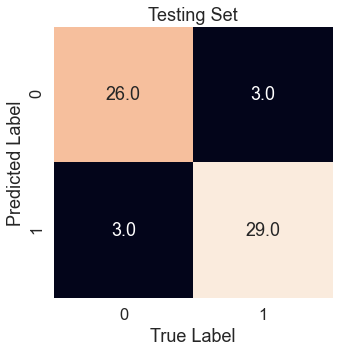

In [24]:
model = SVC(probability=True)
svc = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
Y_pred2 = model.predict(X_train)

from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test,Y_pred)
f1 = metrics.f1_score(Y_test,Y_pred)
recall = metrics.recall_score(Y_test,Y_pred)
precision = metrics.precision_score(Y_test,Y_pred)
print("Accuracy: " + str(round((accuracy*100),2))+"%")
print("Precision: " + str(round((precision),2)))
print("Recall: " + str(round((recall),2)))
print("F1 Score: " + str(round((f1),2)))

sns.set(font_scale=1.5)
fig,ax=plt.subplots(figsize=(5,5))
ax=sns.heatmap(confusion_matrix(Y_train, Y_pred2),annot=True,cbar=False,fmt=".1f")
plt.title('Training Set')
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

sns.set(font_scale=1.5)
fig,ax=plt.subplots(figsize=(5,5))
ax=sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,cbar=False,fmt=".1f")
plt.title('Testing Set')
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

In [30]:
print(model)

SVC(probability=True)


In [26]:
# Saving Model with pickle
import pickle
pickle.dump(model,open(r'heart_disease_model.pkl','wb'))